In [1]:
! pip install -U accelerate
! pip install -U transformers[torch]
! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import warnings
warnings.filterwarnings('ignore')

#토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

#모델 불러오기
model = TFBertModel.from_pretrained("bert-base-multilingual-cased", num_labels=6)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# 데이터 셋 불러오기

In [4]:
# 데이터 셋 불러오기
train_data = pd.read_excel("/content/drive/MyDrive/dataset/감성대화말뭉치(최종데이터)_Training.xlsx", index_col = 0)
train_data = train_data.dropna()
test_data = pd.read_excel("/content/drive/MyDrive/dataset/감성대화말뭉치(최종데이터)_Validation.xlsx", index_col = 0)
test_data = test_data.dropna()

In [5]:
train_data.drop(['감정_소분류','시스템문장1','시스템문장2','시스템문장3', '사람문장2', '사람문장3', '신체질환'], axis=1, inplace=True)
train_data

,연령,성별,상황키워드,감정_대분류,사람문장1
305,중년,여성,"재정,은퇴,노후준비",상처,지금까지 힘들게 일했는데 은퇴해서 돈이 없다고 하니 자식이 화를 내서 상처를 받았어.
306,중년,여성,"재정,은퇴,노후준비",상처,친구한테 은퇴할 거라고 얘기했더니 앞으로 뭘 먹고 살 거냐면서 비웃더라고. 기분이 ...
307,중년,여성,"재정,은퇴,노후준비",상처,친구한테 은퇴한다고 했더니 그게 말이나 되는 거냐며 날 한심한 사람 취급해서 서운했어.
308,중년,여성,"재정,은퇴,노후준비",상처,그동안 열심히 달려와서 좀 쉬려고 하는데 은퇴한다고 하니 주변에서 다 말려서 기분이...
309,중년,여성,"재정,은퇴,노후준비",상처,많은 고민 후 은퇴를 결심했는데 주변에서 다들 섣부른 생각이라고 해서 마음이 안 좋아.
...,...,...,...,...,...
51626,노년,남성,재정,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.
51627,노년,여성,재정,불안,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.
51628,노년,여성,재정,상처,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.
51629,노년,여성,대인관계,불안,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.


In [6]:
train_data = train_data.rename(columns={'감정_대분류':'감정', '사람문장1':'텍스트'})
train_data

,연령,성별,상황키워드,감정,텍스트
305,중년,여성,"재정,은퇴,노후준비",상처,지금까지 힘들게 일했는데 은퇴해서 돈이 없다고 하니 자식이 화를 내서 상처를 받았어.
306,중년,여성,"재정,은퇴,노후준비",상처,친구한테 은퇴할 거라고 얘기했더니 앞으로 뭘 먹고 살 거냐면서 비웃더라고. 기분이 ...
307,중년,여성,"재정,은퇴,노후준비",상처,친구한테 은퇴한다고 했더니 그게 말이나 되는 거냐며 날 한심한 사람 취급해서 서운했어.
308,중년,여성,"재정,은퇴,노후준비",상처,그동안 열심히 달려와서 좀 쉬려고 하는데 은퇴한다고 하니 주변에서 다 말려서 기분이...
309,중년,여성,"재정,은퇴,노후준비",상처,많은 고민 후 은퇴를 결심했는데 주변에서 다들 섣부른 생각이라고 해서 마음이 안 좋아.
...,...,...,...,...,...
51626,노년,남성,재정,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.
51627,노년,여성,재정,불안,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.
51628,노년,여성,재정,상처,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.
51629,노년,여성,대인관계,불안,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.


In [7]:
test_data.drop(['감정_소분류','시스템문장1','시스템문장2','시스템문장3', '사람문장2', '사람문장3', '신체질환'], axis=1, inplace=True)
test_data

,연령,성별,상황키워드,감정_대분류,사람문장1
1,청년,남성,"진로,취업,직장",불안,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
2,청년,남성,"진로,취업,직장",불안,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.
3,청년,남성,"진로,취업,직장",불안,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.
4,청년,남성,"진로,취업,직장",불안,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.
5,청년,남성,"진로,취업,직장",불안,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.
...,...,...,...,...,...
6557,청년,여성,대인관계,분노,나 정말 화가 나 죽겠어.
6558,중년,여성,"재정,은퇴,노후준비",기쁨,내 나이가 되면 원망도 줄어들고 고마운 마음이 더 많아지는 거 같아.
6577,청소년,여성,학교폭력/따돌림,불안,나 요즘 친구들이 나를 은근히 피하고 장난도 더 심하게 치는 것 같아서 혹시 나를 ...
6579,청소년,여성,학교폭력/따돌림,기쁨,나 요즘 마음이 편안해.


In [8]:
test_data = test_data.rename(columns={'감정_대분류':'감정', '사람문장1':'텍스트'})
test_data

,연령,성별,상황키워드,감정,텍스트
1,청년,남성,"진로,취업,직장",불안,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
2,청년,남성,"진로,취업,직장",불안,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.
3,청년,남성,"진로,취업,직장",불안,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.
4,청년,남성,"진로,취업,직장",불안,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.
5,청년,남성,"진로,취업,직장",불안,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.
...,...,...,...,...,...
6557,청년,여성,대인관계,분노,나 정말 화가 나 죽겠어.
6558,중년,여성,"재정,은퇴,노후준비",기쁨,내 나이가 되면 원망도 줄어들고 고마운 마음이 더 많아지는 거 같아.
6577,청소년,여성,학교폭력/따돌림,불안,나 요즘 친구들이 나를 은근히 피하고 장난도 더 심하게 치는 것 같아서 혹시 나를 ...
6579,청소년,여성,학교폭력/따돌림,기쁨,나 요즘 마음이 편안해.


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['연령', '성별', '상황키워드', '감정']:
    label_encoder = LabelEncoder()
    train_data[column] = label_encoder.fit_transform(train_data[column])
    label_encoders[column] = label_encoder

# 결과 출력
print(train_data)

       연령  성별  상황키워드  감정                                                텍스트
305     1   1      7   4    지금까지 힘들게 일했는데 은퇴해서 돈이 없다고 하니 자식이 화를 내서 상처를 받았어.
306     1   1      7   4  친구한테 은퇴할 거라고 얘기했더니 앞으로 뭘 먹고 살 거냐면서 비웃더라고. 기분이 ...
307     1   1      7   4   친구한테 은퇴한다고 했더니 그게 말이나 되는 거냐며 날 한심한 사람 취급해서 서운했어.
308     1   1      7   4  그동안 열심히 달려와서 좀 쉬려고 하는데 은퇴한다고 하니 주변에서 다 말려서 기분이...
309     1   1      7   4   많은 고민 후 은퇴를 결심했는데 주변에서 다들 섣부른 생각이라고 해서 마음이 안 좋아.
...    ..  ..    ...  ..                                                ...
51626   0   0      6   2     나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.
51627   0   1      6   3        몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.
51628   0   1      6   4   이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.
51629   0   1      3   3  몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.
51630   0   1      3   4  남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.

[42694 rows x 5 columns]


In [10]:
# test_data_encoded = pd.get_dummies(test_data, columns=['감정', '연령', '성별'])
# test_data_encoded

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['연령', '성별', '상황키워드', '감정']:
    label_encoder = LabelEncoder()
    test_data[column] = label_encoder.fit_transform(test_data[column])
    label_encoders[column] = label_encoder

# 결과 출력
print(test_data)

      연령  성별  상황키워드  감정                                                텍스트
1      2   0      9   3  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
2      2   0      9   3              회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.
3      2   0      9   3                      상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.
4      2   0      9   3          이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.
5      2   0      9   3                       직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.
...   ..  ..    ...  ..                                                ...
6557   2   1      3   2                                     나 정말 화가 나 죽겠어.
6558   1   1      7   0             내 나이가 되면 원망도 줄어들고 고마운 마음이 더 많아지는 거 같아.
6577   3   1     10   3  나 요즘 친구들이 나를 은근히 피하고 장난도 더 심하게 치는 것 같아서 혹시 나를 ...
6579   3   1     10   0                                      나 요즘 마음이 편안해.
6581   2   0      5   1                      여자친구랑 뷔페를 갔는데 좀 당황스러운 일이 있었어.

[4686 rows x 5 columns]


# Tokenizing

In [11]:
from transformers import BertTokenizer, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode(data, tokenizer):
    input_ids = []
    attention_masks = []
    token_type_ids = []
    for text in data:
        tokenized_text = tokenizer.encode_plus(text,
                                            max_length=50,
                                            add_special_tokens = True,
                                            pad_to_max_length=True,
                                            return_attention_mask=True,
                                              truncation=True)
        input_ids.append(tokenized_text['input_ids'])
        attention_masks.append(tokenized_text['attention_mask'])
        token_type_ids.append(tokenized_text['token_type_ids'])

    return input_ids, attention_masks, token_type_ids

In [12]:
X_train = train_data["텍스트"]
X_test = test_data["텍스트"]
y_train = train_data["감정"]
y_test = test_data["감정"]

In [13]:
#학습 데이터
train_input_ids, train_attention_masks, train_token_type_ids = encode(X_train, tokenizer)

#테스트 데이터
test_input_ids, test_attention_masks, test_token_type_ids = encode(X_test, tokenizer)


In [14]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
      }, label

def data_encode(input_ids_list, attention_mask_list, token_type_ids_list, label_list):
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

BATCH_SIZE=32

train_data_encoded = data_encode(train_input_ids, train_attention_masks, train_token_type_ids, y_train).shuffle(10000).batch(BATCH_SIZE)
test_data_encoded = data_encode(test_input_ids, test_attention_masks, test_token_type_ids, y_test).batch(BATCH_SIZE)


In [15]:
from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode(data, age_data, gender_data, tokenizer):
    input_ids = []
    attention_masks = []
    token_type_ids = []

    for text, age, gender in zip(data, age_data, gender_data):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=50,
            add_special_tokens=True,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            truncation=True
        )

        input_ids.append(tokenized_text['input_ids'])
        attention_masks.append(tokenized_text['attention_mask'])

        # Add age information to token_type_ids
        age_ids = [int(age)] * len(tokenized_text['input_ids'])
        # Add gender information to token_type_ids
        gender_ids = [int(gender)] * len(tokenized_text['input_ids'])

        # Concatenate age and gender token_type_ids
        combined_ids = [a + g for a, g in zip(age_ids, gender_ids)]
        token_type_ids.append(combined_ids)

    return input_ids, attention_masks, token_type_ids

# Assuming train_data["연령"] and train_data["성별"] are numerical features
X_train = train_data["텍스트"]
age_train = train_data["연령"]
gender_train = train_data["성별"]
y_train = train_data["감정"]

# Assuming test_data["연령"] and test_data["성별"] are numerical features
X_test = test_data["텍스트"]
age_test = test_data["연령"]
gender_test = test_data["성별"]
y_test = test_data["감정"]

# Encoding training data
train_input_ids, train_attention_masks, train_token_type_ids = encode(X_train, age_train, gender_train, tokenizer)

# Encoding test data
test_input_ids, test_attention_masks, test_token_type_ids = encode(X_test, age_test, gender_test, tokenizer)

# Defining mapping function and encoding the data using tf.data.Dataset
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
    }, label

def data_encode(input_ids_list, attention_mask_list, token_type_ids_list, label_list):
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Batch size
BATCH_SIZE = 16

# Creating encoded datasets
train_data_encoded = data_encode(train_input_ids, train_attention_masks, train_token_type_ids, y_train).shuffle(10000).batch(BATCH_SIZE)
test_data_encoded = data_encode(test_input_ids, test_attention_masks, test_token_type_ids, y_test).batch(BATCH_SIZE)


# 두번째 방법 학습

In [16]:
model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 6
)


optimizer = tf.keras.optimizers.Adam(1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

NUM_EPOCHS = 20
history = model.fit(train_data_encoded, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
2669/2669 [==============================] - 612s 210ms/step - loss: 1.3881 - accuracy: 0.4447 - val_loss: 1.1948 - val_accuracy: 0.5380
Epoch 2/20
2669/2669 [==============================] - 555s 208ms/step - loss: 1.1912 - accuracy: 0.5384 - val_loss: 1.1266 - val_accuracy: 0.5649
Epoch 3/20
2669/2669 [==============================] - 554s 208ms/step - loss: 1.1349 - accuracy: 0.5640 - val_loss: 1.1012 - val_accuracy: 0.5747
Epoch 4/20
2669/2669 [==============================] - 554s 208ms/step - loss: 1.0836 - accuracy: 0.5844 - val_loss: 1.0381 - val_accuracy: 0.6120
Epoch 5/20
2669/2669 [==============================] - 554s 208ms/step - loss: 1.0239 - accuracy: 0.6127 - val_loss: 1.0454 - val_accuracy: 0.6095
Epoch 6/20
2669/2669 [==============================] - 557s 209ms/step - loss: 0.9604 - accuracy: 0.6370 - val_loss: 0.9864 - val_accuracy: 0.6417
Epoch 7/20
2669/2669 [==============================] - 557s 209ms/step - loss: 0.8848 - accuracy: 0.6718 - val_

# 정확도 그래프

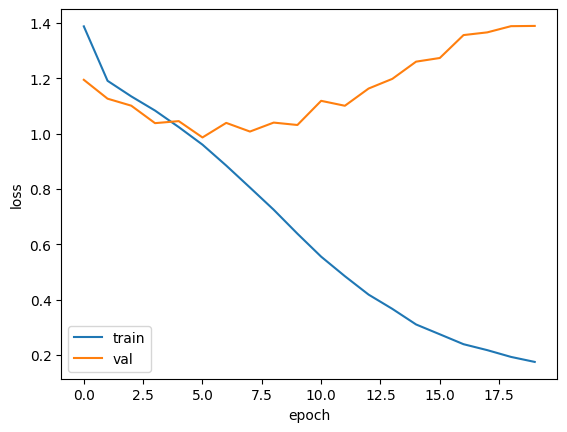

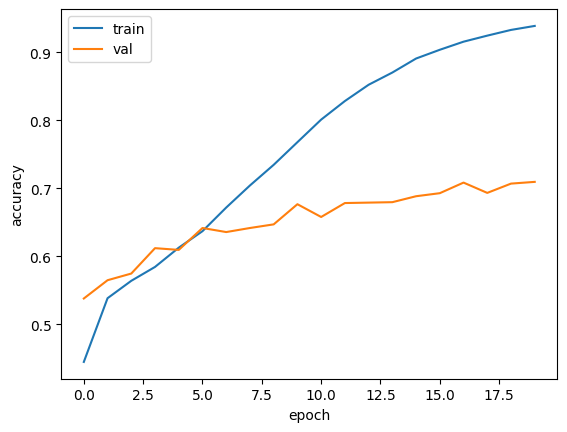

In [17]:
# loss 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


# accuracy 확인
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [18]:
model.save('/content/drive/MyDrive/happy_parts/my_saved_model')